In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df_hdac = pd.read_csv('data/HDAC/GSE15222_series_matrix_x100.txt', sep = '\t', skiprows = 62)
df_hdac = df_hdac.set_index('ID_REF').T 
hdac_names = df_hdac.columns.values
df_hdac.head()




ID_REF,GI_10047089-S,GI_10047091-S,GI_10047093-S,GI_10047099-S,GI_10047103-S,GI_10047105-S,GI_10047121-S,GI_10047123-S,GI_10047133-A,GI_10047133-I,...,GI_10834999-S,GI_10835001-S,GI_10835009-S,GI_10835012-S,GI_10835020-S,GI_10835022-S,GI_10835024-S,GI_10835040-S,GI_10835046-S,GI_10835048-S
GSM225652,19.4,5766.0,133.7,41.9,876.3,10.2,3.4,29.4,99.9,10.5,...,0.5,942.8,108.7,3.0,290.1,937.7,2258.3,-0.1,319.9,942.4
GSM225662,-11.8,6135.9,48.4,-4.8,934.6,14.4,-7.6,48.2,87.7,18.8,...,24.1,890.4,84.3,3.9,599.5,356.0,2788.5,-10.1,215.3,1144.4
GSM225664,-3.6,8342.0,65.5,4.6,947.1,7.6,-0.8,22.6,209.3,13.4,...,3.8,594.6,72.6,1.0,241.4,437.2,3224.7,6.0,148.7,1128.6
GSM225665,-10.3,3891.9,92.8,28.8,1085.7,9.7,-11.2,29.6,75.6,27.1,...,6.2,669.4,120.8,-19.0,205.4,682.8,1948.6,-9.4,169.9,796.1
GSM225666,30.4,5392.9,100.9,28.4,869.3,8.1,-2.9,32.7,155.6,5.4,...,4.2,677.2,110.4,1.8,195.9,1133.6,1890.2,3.1,304.5,876.3


In [75]:
var1_name = hdac_names[10]
var2_name = hdac_names[7]
df_plot = df_hdac.loc[:,[var1_name, var2_name]]
df_plot.head()

ID_REF,GI_10092578-S,GI_10047123-S
GSM225652,-3.7,29.4
GSM225662,-7.0,48.2
GSM225664,-5.5,22.6
GSM225665,-10.0,29.6
GSM225666,-3.1,32.7


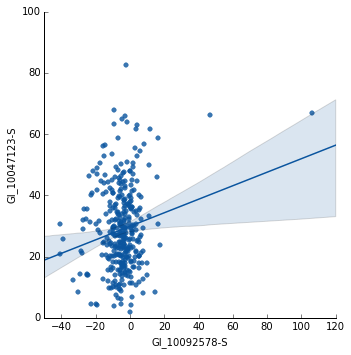

In [76]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]


# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot, fit_reg=True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-50, 120), ylim = (0, 100))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

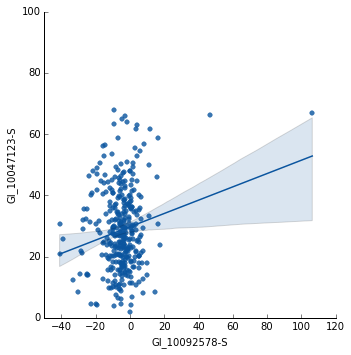

In [77]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]

df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]]!=df_plot[df_plot.columns.values[1]].max()]
#df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]] > 1500 & df_plot[df_plot.columns.values[1]] < 2000,
#                        df_plot[df_plot.columns.values[2]] > 40 & df_plot[df_plot.columns.values[2]] < 60]

# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot_rm, fit_reg=True, truncate = True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-50, 120), ylim = (0, 100))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

In [78]:
var1_name = hdac_names[94]
var2_name = hdac_names[10]
df_plot = df_hdac.loc[:,[var1_name, var2_name]]
df_plot.head()

ID_REF,GI_10835020-S,GI_10092578-S
GSM225652,290.1,-3.7
GSM225662,599.5,-7.0
GSM225664,241.4,-5.5
GSM225665,205.4,-10.0
GSM225666,195.9,-3.1


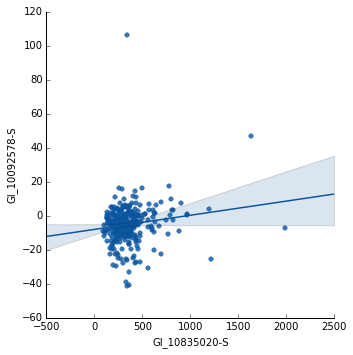

In [83]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]


# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot, fit_reg=True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-500, 2500), ylim = (-60, 120))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

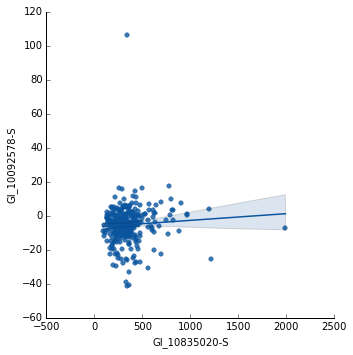

In [109]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]

df_plot_rm = df_plot[(df_plot.iloc[:,0] < 1500) | (df_plot.iloc[:,0] > 2000)]
df_plot_rm = df_plot[(df_plot.iloc[:,1] < 40) | (df_plot.iloc[:,1] > 60)]

    
# df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]]!=df_plot[df_plot.columns.values[1]].max()]
#df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]] > 1500 & df_plot[df_plot.columns.values[1]] < 2000,
#                        df_plot[df_plot.columns.values[2]] > 40 & df_plot[df_plot.columns.values[2]] < 60]

# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot_rm, fit_reg=True, truncate = True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-500, 2500), ylim = (-60, 120))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

In [127]:
var1_name = hdac_names[33]
var2_name = hdac_names[76]
df_plot = df_hdac.loc[:,[var1_name, var2_name]]
df_plot.head()

ID_REF,GI_10190697-S,GI_10800407-S
GSM225652,-6.8,-3.7
GSM225662,-10.5,-18.5
GSM225664,-3.7,-18.9
GSM225665,-13.0,-17.3
GSM225666,-2.6,-1.3


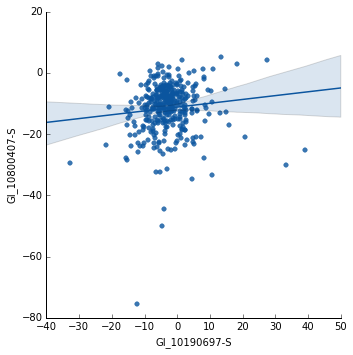

In [129]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]


# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot, fit_reg=True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-40, 50), ylim = (-80, 20))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

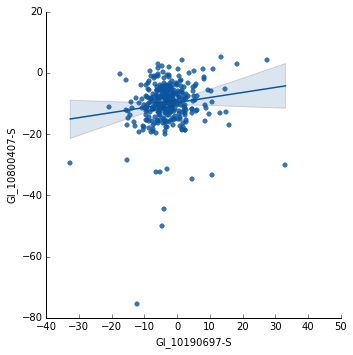

In [131]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]

df_plot_rm = df_plot[(df_plot.iloc[:,0] < 35) | (df_plot.iloc[:,0] > 40)]
df_plot_rm = df_plot[(df_plot.iloc[:,1] < -28) | (df_plot.iloc[:,1] > -20)]

    
# df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]]!=df_plot[df_plot.columns.values[1]].max()]
#df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]] > 1500 & df_plot[df_plot.columns.values[1]] < 2000,
#                        df_plot[df_plot.columns.values[2]] > 40 & df_plot[df_plot.columns.values[2]] < 60]

# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot_rm, fit_reg=True, truncate = True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-40, 50), ylim = (-80, 20))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

In [112]:
df_who = pd.read_csv('data/MINE/WHOfix.txt', sep = '\t', skiprows = 0)
df_who = df_who.set_index('Country')
df_who = df_who.iloc[:,2:]
who_names = df_who.columns.values
df_who.head()




,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),Population living below the poverty line (% living on &lt; US$1 per day),Population median age (years),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,23.0,NaN,16.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
Albania,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,2.0,29.0,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
Algeria,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,64.0,NaN,24.0,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
Andorra,NaN,NaN,NaN,83.0,83.0,74.0,1.0,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,54.0,NaN,17.0,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3


In [122]:
var1_name = who_names[166]
var2_name = who_names[235]
df_plot = df_who.loc[:,[var1_name, var2_name]]
df_plot.columns = [x[0:25] for x in df_plot.columns.values]
df_plot = df_plot.dropna(axis = 0)
df_plot.head()

,Aid_given,Health_expenditure_public
Country,,
Australia,1460.0,17.0
Austria,678.0,15.5
Belgium,1463.0,13.9
Canada,2599.0,17.5
Denmark,2037.0,14.4


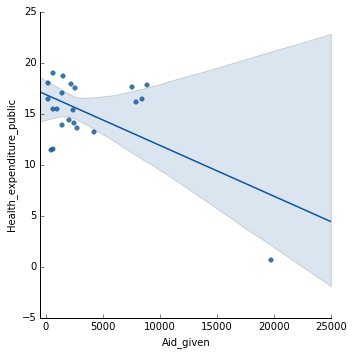

In [124]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]


# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot, fit_reg=True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-500, 25000), ylim = (-5, 25))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    

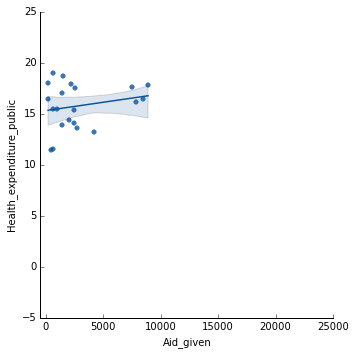

In [125]:
%matplotlib inline

# if the ftype is OTU, reduce the taxa name into abridged form
# shorten var name
if len(var1_name) > 25:
    var1_name = var1_name[0:25]

if len(var2_name) > 25:
    var2_name = var2_name[0:25]

df_plot_rm = df_plot[(df_plot.iloc[:,0] < 15000) | (df_plot.iloc[:,0] > 20000)]
df_plot_rm = df_plot[(df_plot.iloc[:,1] < 0) | (df_plot.iloc[:,1] > 5)]

    
# df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]]!=df_plot[df_plot.columns.values[1]].max()]
#df_plot_rm =df_plot.loc[df_plot[df_plot.columns.values[1]] > 1500 & df_plot[df_plot.columns.values[1]] < 2000,
#                        df_plot[df_plot.columns.values[2]] > 40 & df_plot[df_plot.columns.values[2]] < 60]

# create plot and title
'''
title = 'p, ext_p = ' + '%.2E' % Decimal(row['pvalues']) + \
        ', ' + '%.2E' % Decimal(row['extreme_p']) + ' ' + \
        'Rsq, ext_r2 = ' + '%.2E' % Decimal(row['r2vals']) + \
        ', ' + '%.2E' % Decimal(row['extreme_r'])
if sim:
    title = title + '_' + 'truth = ' + '%.2E' % Decimal(row['truth'])
'''

fig = plt.figure()
rgbs = sns.color_palette("Blues")
test = np.array([rgbs[5]])
sns_plot = sns.lmplot(var1_name, var2_name, data=df_plot_rm, fit_reg=True, truncate = True, scatter_kws={'color':test}, line_kws={'color':test[0]})
sns_plot.set(xlim = (-500, 25000), ylim = (-5, 25))
ax = plt.gca()
# ax.set_title(title, fontsize=8)
fig.patch.set_visible(False)
ax.patch.set_visible(False)
fig.set_tight_layout(True)
plt.tick_params(axis='both', which='both', top=False, right=False)
sns.despine()
# plt.savefig(df_folder_fp + '/' + str(var1) + '_' + str(var2) + '.png')
    
    